#Import

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
from IPython import display
from time import sleep
import math
import matplotlib.pyplot as plt
import plotly.graph_objects as go

#Mount

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Test Functions

## Sphere

<div align='center'>
$f(x) = \sum_{i = 1}^d{x_i^2}$
</div>   
      
- where $x_i \in \left[-5.12;5.12\right]$
- Global minimum: $f(x^*) = 0$, at $x^* = (0,...,0)$

In [ ]:
def Sphere(d):
    sum = 0
    for i in d:
        sum += i*i
    return sum

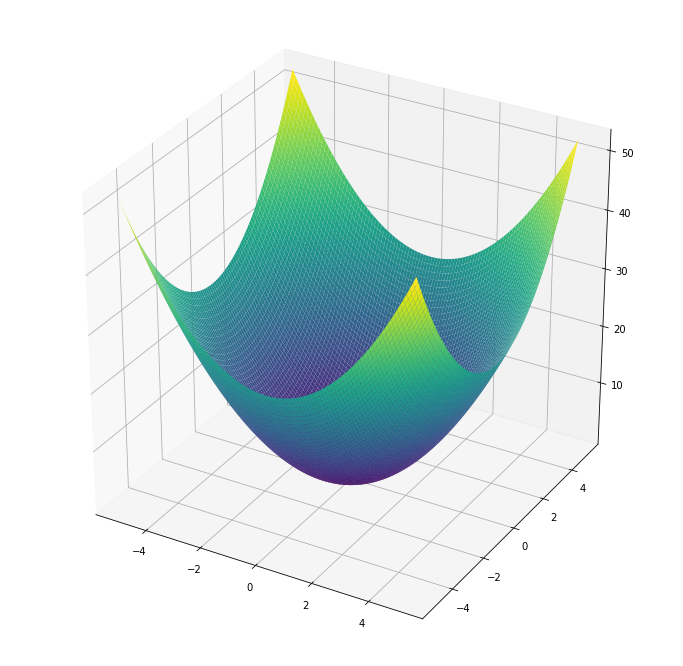

In [ ]:
dimension = 2
popsize= 32#@param
bound_lower = -5.12#@param
bound_upper = 5.12#@param

x = np.linspace(bound_lower, bound_upper, 100)
y = np.linspace(bound_lower, bound_upper, 100)
X, Y = np.meshgrid(x, y)

Z = Sphere([X, Y])
plt.figure(figsize=(12, 12))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

# plt.savefig("/content/drive/MyDrive/cs410/Sphere.png")

##Zakharov

<div align='center'>
$f(x) = \sum_{i=1}^d{x_i^2} + (\sum_{i=1}^d{0.5ix_i})^2 + (\sum_{i=1}^d{0.5ix_i})^4 $
</div>    

- where $x_i \in \left[-5;10\right]$ 
- Global minimum: $f(x^*) = 0$, at $x^* = (0,...,0)$

In [ ]:
def Zakharov(ind):
    d = len(ind)
    sum1 = 0
    sum2 = 0
    for i in range(d):
        sum1 += ind[i]**2
        sum2 += 0.5 * (i+1) * ind[i]

    return sum1 + sum2**2 + sum2**4

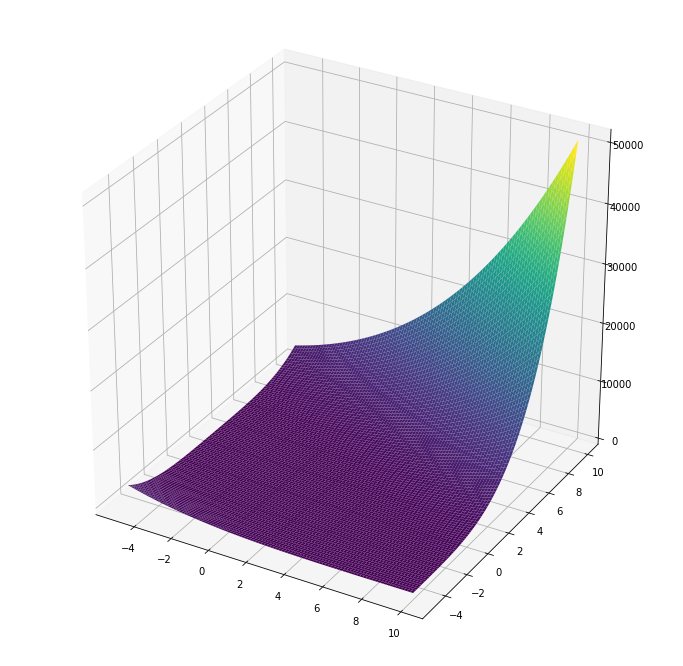

In [ ]:
dimension = 2
popsize= 32#@param
bound_lower = -5#@param
bound_upper = 10#@param

x = np.linspace(bound_lower, bound_upper, 100)
y = np.linspace(bound_lower, bound_upper, 100)
X, Y = np.meshgrid(x, y)

Z = Zakharov([X, Y])
plt.figure(figsize=(12, 12))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

# plt.savefig('/content/drive/MyDrive/cs410/zakharov.png')

##Rosenbrock

<div align='center'>
$f(x) = \sum_{i = 1}^{d-1}\left[100\left(x_{i + 1} - x_i^2\right)^2 + \left(x_i - 1\right)^2\right]$
</div>

- where $x_i \in \left[-2.048; 2.048\right]$     

- Global minimum: $f(x^*) = 0$, at $x^* =(1,...1)$

In [ ]:
def Rosenbrock(d):
    sum = 0
    for i in range(len(d) - 1):
        sum += 100 * (d[i + 1] - d[i]**2)**2 + (d[i] - 1)**2
    return sum 

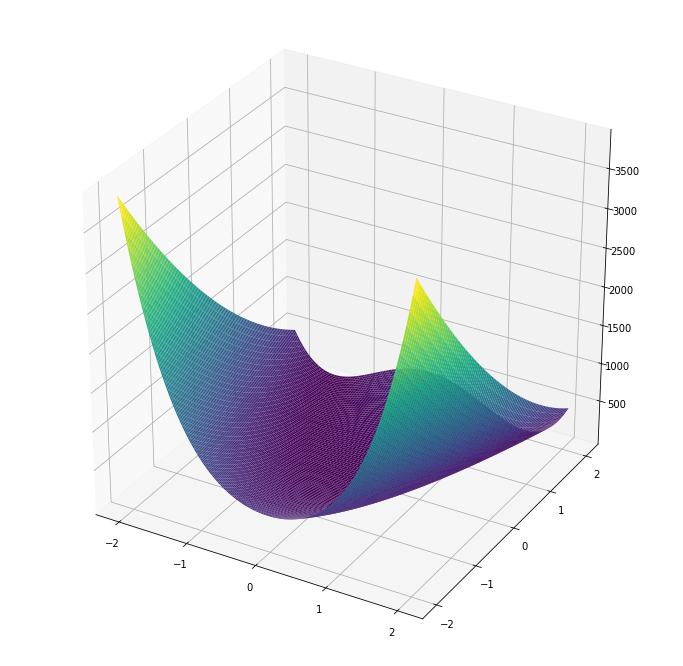

In [ ]:
dimension = 2
popsize= 32#@param
bound_lower = -2.048#@param
bound_upper = 2.048#@param

x = np.linspace(bound_lower, bound_upper, 100)
y = np.linspace(bound_lower, bound_upper, 100)
X, Y = np.meshgrid(x, y)

Z = Rosenbrock([X, Y])
plt.figure(figsize=(12, 12))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

# plt.savefig('/content/drive/MyDrive/cs410/Rosenbrock.png')

##Michalewicz

<div align='center'>
$f(x) = \sum_{i = 1}^d{\frac{x_i^2}{4000}} - \prod_{i = 1}^d{\cos\left(\frac{x_i}{\sqrt{i}}\right) + 1}$
</div>
   
- where $x_i \in \left[-600; 600\right]$    
- Global minimum: $f(x^*) = 0$, at $x^* = (0,...,0)$

In [ ]:
def Michalewicz(ind):
    sum = 0
    for i in range(len(ind)):
        sum += np.sin(ind[i]) * (np.sin(((i+1) * ind[i]**2)/np.pi))**20
    return (-1*sum)

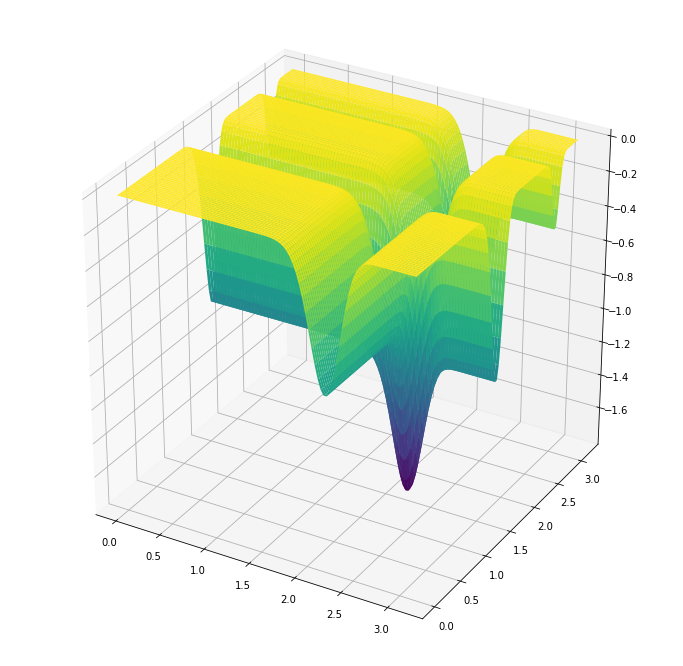

In [ ]:
dimension = 2
popsize= 32#@param
bound_lower = 0#@param
bound_upper = np.pi#@param

x = np.linspace(bound_lower, bound_upper, 100)
y = np.linspace(bound_lower, bound_upper, 100)
X, Y = np.meshgrid(x, y)

Z = Michalewicz([X, Y])
plt.figure(figsize=(12, 12))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

# plt.savefig('/content/drive/MyDrive/cs410/Michalewicz.png')

## Ackley

<div align='center'>
$f(x) = -a\exp\left(-b\sqrt{\frac{1}{d}\sum_{i=1}^d{x_i^2}}\right) - \exp\left(\frac{1}{d}\sum_{i=1}^d{\cos\left(cx_i\right)}\right) + a + \exp{(1)}$
</div>
       
- where $x_i \in \left[-32.768; 32.768\right]$     

- $a = 20$, $b =0.2$ and $c = 2\pi$ (recommended)   
- Global minimum: $f(x^*) = 0$, at $x^* = (0,...,0)$   

In [ ]:
def Ackley(d):
    a = 20
    b = 0.2
    c = 2 * np.pi
    sum1 = 0
    sum2 = 0
    for i in range(len(d)):
        sum1 += d[i] ** 2
        sum2 += np.cos(c * d[i])
    term1 = -a * np.exp(-b * np.sqrt(sum1 / len(d)))
    term2 = -np.exp(sum2 / len(d))

    return term1 + term2 + a + np.exp(1)

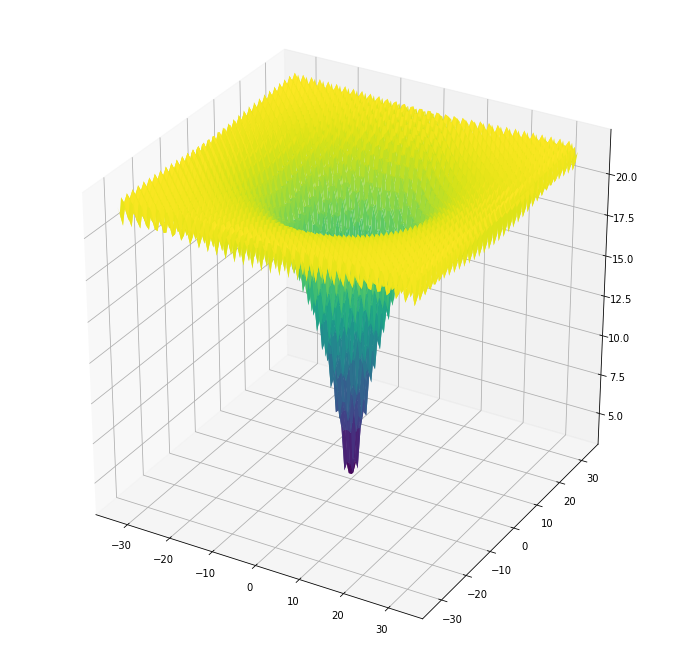

In [ ]:
dimension = 2
popsize= 32#@param
bound_lower = -32.768#@param
bound_upper = 32.768#@param

x = np.linspace(bound_lower, bound_upper, 100)
y = np.linspace(bound_lower, bound_upper, 100)
X, Y = np.meshgrid(x, y)

Z = Ackley([X, Y])
plt.figure(figsize=(12, 12))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

# plt.savefig('/content/drive/MyDrive/cs410/Ackley.png')

# Constants

In [ ]:
## DE
F_scale=0.8#@param
cross_prob=0.7#@param

# DE

In [ ]:
def DE(test_function, dimension, bounds, F_scale, cross_prob, popsize, max_evals):
    """
    Differential Evolution algorithm

    Args:
    test_function -- function to conduct
    bound_lower -- lower bound of the test function
    bound_upper -- upper bound of the test function
    F_scale -- scale factor on mutation
    cross_prob -- the probability of 2 individuals to do crossover
    popsize -- the population size
    max_evals -- the maximum fitness evaluation for the algorithm

    Returns:
    results -- best results after finishing the algorithm
    all_pops -- all the population 
    """

    eps = -9.66015

    bound_lower, bound_upper = np.asarray(bounds).T

    diff = np.fabs(bound_lower - bound_upper)

    pop = bound_lower + diff * np.random.rand(popsize, dimension)

    fitness = np.asarray([test_function(ind) for ind in pop])
    num_eval = 0
    
    best_idx = np.argmin(fitness)
    best = pop[best_idx]

    results = []
    all_pops = []
    results.append((np.copy(best), fitness[best_idx], num_eval))
    results.append((np.copy(best), fitness[best_idx], num_eval+len(pop)))
    all_pops.append(np.copy(pop))
    generation_count = 0

    while True:
        if num_eval > max_evals:
            break
        for i in range(popsize):
            # Mutation step
            idxes = [idx for idx in range(popsize) if idx != i]
            a, b, c = pop[np.random.choice(idxes, 3, replace=False)]
            mutant = np.clip(F_scale*(b - c) + a, bound_lower, bound_upper)

            # Create cross point
            cross_points = np.random.rand(dimension) < cross_prob
            if not np.any(cross_points):
                cross_points[np.random.randint(0, dimension)] = True
            
            # Offspring
            trial = np.where(cross_points, mutant, pop[i])

            # Evaluate fitness
            f = test_function(trial)
            num_eval += 1

            if f < fitness[i]:
                pop[i] = trial
                fitness[i] = f 
                if f < fitness[best_idx]:
                    best = trial
                    best_idx = i

        results.append((np.copy(best), fitness[best_idx], num_eval))
        all_pops.append(np.copy(pop))
        num_eval += 1
        if test_function(best) < eps:
            break

        generation_count += 1

    return results, all_pops, generation_count

# CEMv2

In [ ]:
def CEMv2(test_function, dimensions, bounds, popsize, num_elite, sigma_init, extra_std, seed_number):
    np.random.seed(seed_number)
    eps = -9.66015
    bound_lower, bound_upper = np.asarray(bounds).T
    sigma = sigma_init * np.eye(dimensions)

    diff = np.fabs(bound_lower - bound_upper)
    n_evals = 0
    num_evals = [0]
    mu = np.random.rand(dimensions) - (bound_upper + 1)
    generation_count = 0
    all_mu = []
    all_sigma = []
    all_offspring = []
    all_elite = []
    all_fitness = []
    while True:
    # for i in range(10000):
        if n_evals > max_evals:
            break
        all_mu.append(mu)
        all_sigma.append(sigma)

        x = np.random.multivariate_normal(mu, sigma, popsize)
        all_offspring.append(x)
        fitness = np.array([test_function(x[i]) for i in range(popsize)])
        n_evals += popsize
        best_fitness = max(fitness) 
        all_fitness.append(best_fitness)
        if best_fitness < eps or np.sum(x) > 1e150 or np.sum(x) < -1e150:
            break

        elite_idx = fitness.argsort()[:num_elite]
        all_elite.append(elite_idx)

        sigma = np.zeros_like(sigma)

        for i in range(num_elite):
            z = x[elite_idx[i]] - mu
            z = z.reshape(-1, 1)
            sigma += tf.matmul(z.T, z)

        sigma += np.eye(dimension)*extra_std
        sigma *= (1/num_elite)
        mu = np.mean(x[elite_idx], axis=0)

        generation_count += 1
        num_evals.append(n_evals)

    all_mu.append(mu)
    best_results = mu.copy()
    best_fitness = test_function(mu)
    return all_mu, all_fitness, num_evals, generation_count

# Plot

In [ ]:
dimension = 2#@param
max_evals = 1e5#@param
test_function = Rosenbrock#@param
seed_number = 19520448#@param
popsize = 128#@param
bound_lower = -2.048#@param
bound_upper = 2.048#@param
num_elite = 10#@param
sigma_init = 4#@param
extra_std = 0.01#@param

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(test_function, dimension, [(bound_lower, bound_upper)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_cemv2_128 = []
plt_std_cemv2_128 = []
plt_eval_cemv2_128 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_cemv2_128.append(np.mean(fitness))
    plt_std_cemv2_128.append(np.std(fitness))
    plt_eval_cemv2_128.append(np.mean(eval))

In [ ]:
dimension = 2#@param
max_evals = 1e5#@param
test_function = Rosenbrock#@param
seed_number = 19520448#@param
popsize = 1024#@param
bound_lower = -2.048#@param
bound_upper = 2.048#@param
num_elite = 10#@param
sigma_init = 4#@param
extra_std = 0.01#@param

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(test_function, dimension, [(bound_lower, bound_upper)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_cemv2_1024 = []
plt_std_cemv2_1024 = []
plt_eval_cemv2_1024 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_cemv2_1024.append(np.mean(fitness))
    plt_std_cemv2_1024.append(np.std(fitness))
    plt_eval_cemv2_1024.append(np.mean(eval))

In [ ]:
all_results = []

dimension = 2#@param
max_evals = 1e5#@param
test_function = Rosenbrock#@param
seed_number = 19520448#@param
bound_lower = -2.048#@param
bound_upper = 2.048#@param
popsize = 128#@param

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(test_function, dimension, [(bound_lower, bound_upper)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results)
    seed_number += 1

plt_fitness_de_128 = []
plt_std_de_128 = []
plt_eval_de_128 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_de_128.append(np.mean(fitness))
    plt_std_de_128.append(np.std(fitness))
    plt_eval_de_128.append(np.mean(eval))

In [ ]:
all_results = []

dimension = 2#@param
max_evals = 1e5#@param
test_function = Rosenbrock#@param
seed_number = 19520925#@param
bound_lower = -2.048#@param
bound_upper = 2.048#@param
popsize = 1024#@param

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(test_function, dimension, [(bound_lower, bound_upper)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results)
    seed_number += 1

plt_fitness_de_1024 = []
plt_std_de_1024 = []
plt_eval_de_1024 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_de_1024.append(np.mean(fitness))
    plt_std_de_1024.append(np.std(fitness))
    plt_eval_de_1024.append(np.mean(eval))

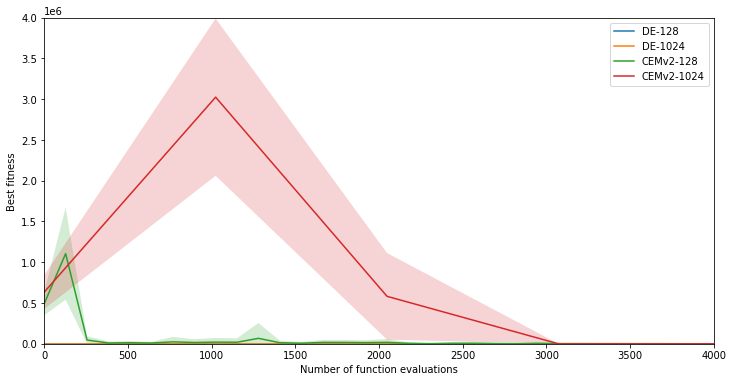

In [ ]:
error1_cemv2_128, error2_cemv2_128 = [], []
for i in range(len(plt_fitness_cemv2_128)):
    error1_cemv2_128.append(plt_fitness_cemv2_128[i] + plt_std_cemv2_128[i])
    error2_cemv2_128.append(plt_fitness_cemv2_128[i] - plt_std_cemv2_128[i])

error1_cemv2_1024, error2_cemv2_1024 = [], []
for i in range(len(plt_fitness_cemv2_1024)):
    error1_cemv2_1024.append(plt_fitness_cemv2_1024[i] + plt_std_cemv2_1024[i])
    error2_cemv2_1024.append(plt_fitness_cemv2_1024[i] - plt_std_cemv2_1024[i])

error1_de_128, error2_de_128 = [], []
for i in range(len(plt_fitness_de_128)):
    error1_de_128.append(plt_fitness_de_128[i] + plt_std_de_128[i])
    error2_de_128.append(plt_fitness_de_128[i] - plt_std_de_128[i])

error1_de_1024, error2_de_1024 = [], []
for i in range(len(plt_fitness_de_1024)):
    error1_de_1024.append(plt_fitness_de_1024[i] + plt_std_de_1024[i])
    error2_de_1024.append(plt_fitness_de_1024[i] - plt_std_de_1024[i])

plt.figure(figsize=(12, 6))
plt.xlim(left=0, right=2200)

plt.ylim(0, 4e6)
plt.xlim(0, 4e3)

# DE 128
plt.plot(plt_eval_de_128, plt_fitness_de_128, label='DE-128')
plt.fill_between(plt_eval_de_128, error1_de_128, error2_de_128, alpha=0.2)

# DE 1024
plt.plot(plt_eval_de_1024, plt_fitness_de_1024, label='DE-1024')
plt.fill_between(plt_eval_de_1024, error1_de_1024, error2_de_1024, alpha=0.2)

# CEMv2 128
plt.plot(plt_eval_cemv2_128, plt_fitness_cemv2_128,label='CEMv2-128')
plt.fill_between(plt_eval_cemv2_128, error1_cemv2_128, error2_cemv2_128, alpha=0.2)

# CEMv2 1024
plt.plot(plt_eval_cemv2_1024, plt_fitness_cemv2_1024, label='CEMv2-1024')
plt.fill_between(plt_eval_cemv2_1024, error1_cemv2_1024, error2_cemv2_1024, alpha=0.2)

plt.xlabel('Number of function evaluations')
plt.ylabel('Best fitness')
plt.legend()
plt.savefig('/content/drive/MyDrive/cs410/plot/Rosenbrock-2d.png')
plt.show()

In [ ]:
dimension = 10#@param
max_evals = 1e6#@param
test_function = Michalewicz#@param
seed_number = 19520448#@param
popsize = 128#@param
bound_lower = 0#@param
bound_upper = np.pi#@param
num_elite = 10#@param
sigma_init = 4#@param
extra_std = 0.01#@param

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(test_function, dimension, [(bound_lower, bound_upper)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_cemv2_128 = []
plt_std_cemv2_128 = []
plt_eval_cemv2_128 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_cemv2_128.append(np.mean(fitness))
    plt_std_cemv2_128.append(np.std(fitness))
    plt_eval_cemv2_128.append(np.mean(eval))

In [ ]:
dimension = 10#@param
max_evals = 1e6#@param
test_function = Michalewicz#@param
seed_number = 19520448#@param
popsize = 1024#@param
bound_lower = 0#@param
bound_upper = np.pi#@param
num_elite = 10#@param
sigma_init = 4#@param
extra_std = 0.01#@param

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(test_function, dimension, [(bound_lower, bound_upper)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_cemv2_1024 = []
plt_std_cemv2_1024 = []
plt_eval_cemv2_1024 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_cemv2_1024.append(np.mean(fitness))
    plt_std_cemv2_1024.append(np.std(fitness))
    plt_eval_cemv2_1024.append(np.mean(eval))

In [ ]:
all_results = []

dimension = 10#@param
max_evals = 1e6#@param
test_function = Michalewicz#@param
seed_number = 19520448#@param
bound_lower = 0#@param
bound_upper = np.pi#@param
popsize = 128#@param

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(test_function, dimension, [(bound_lower, bound_upper)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results)
    seed_number += 1

plt_fitness_de_128 = []
plt_std_de_128 = []
plt_eval_de_128 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_de_128.append(np.mean(fitness))
    plt_std_de_128.append(np.std(fitness))
    plt_eval_de_128.append(np.mean(eval))

In [ ]:
all_results = []

dimension = 10#@param
max_evals = 1e6#@param
test_function = Michalewicz#@param
seed_number = 19520448#@param
bound_lower = 0#@param
bound_upper = np.pi#@param
popsize = 1024#@param

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(test_function, dimension, [(bound_lower, bound_upper)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results)
    seed_number += 1

plt_fitness_de_1024 = []
plt_std_de_1024 = []
plt_eval_de_1024 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_de_1024.append(np.mean(fitness))
    plt_std_de_1024.append(np.std(fitness))
    plt_eval_de_1024.append(np.mean(eval))

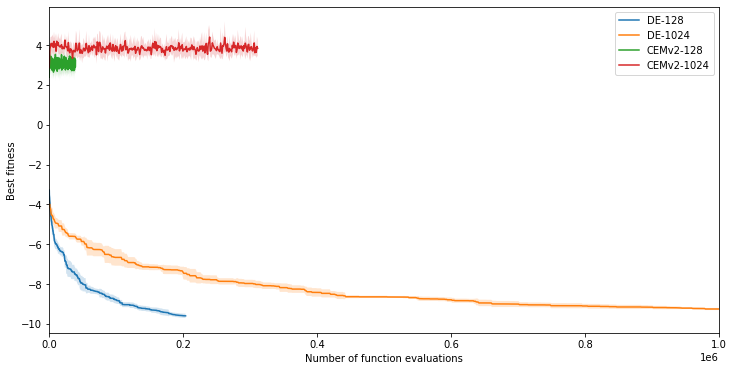

In [ ]:
error1_cemv2_128, error2_cemv2_128 = [], []
for i in range(len(plt_fitness_cemv2_128)):
    error1_cemv2_128.append(plt_fitness_cemv2_128[i] + plt_std_cemv2_128[i])
    error2_cemv2_128.append(plt_fitness_cemv2_128[i] - plt_std_cemv2_128[i])

error1_cemv2_1024, error2_cemv2_1024 = [], []
for i in range(len(plt_fitness_cemv2_1024)):
    error1_cemv2_1024.append(plt_fitness_cemv2_1024[i] + plt_std_cemv2_1024[i])
    error2_cemv2_1024.append(plt_fitness_cemv2_1024[i] - plt_std_cemv2_1024[i])

error1_de_128, error2_de_128 = [], []
for i in range(len(plt_fitness_de_128)):
    error1_de_128.append(plt_fitness_de_128[i] + plt_std_de_128[i])
    error2_de_128.append(plt_fitness_de_128[i] - plt_std_de_128[i])

error1_de_1024, error2_de_1024 = [], []
for i in range(len(plt_fitness_de_1024)):
    error1_de_1024.append(plt_fitness_de_1024[i] + plt_std_de_1024[i])
    error2_de_1024.append(plt_fitness_de_1024[i] - plt_std_de_1024[i])

plt.figure(figsize=(12, 6))
plt.xlim(left=0, right=2200)

# # plt.ylim(0, 10)
plt.xlim(0, 1e6)

# DE 128
plt.plot(plt_eval_de_128, plt_fitness_de_128, label='DE-128')
plt.fill_between(plt_eval_de_128, error1_de_128, error2_de_128, alpha=0.2)

# DE 1024
plt.plot(plt_eval_de_1024, plt_fitness_de_1024, label='DE-1024')
plt.fill_between(plt_eval_de_1024, error1_de_1024, error2_de_1024, alpha=0.2)

# CEMv2 128
plt.plot(plt_eval_cemv2_128, plt_fitness_cemv2_128,label='CEMv2-128')
plt.fill_between(plt_eval_cemv2_128, error1_cemv2_128, error2_cemv2_128, alpha=0.2)

# CEMv2 1024
plt.plot(plt_eval_cemv2_1024, plt_fitness_cemv2_1024, label='CEMv2-1024')
plt.fill_between(plt_eval_cemv2_1024, error1_cemv2_1024, error2_cemv2_1024, alpha=0.2)

plt.xlabel('Number of function evaluations')
plt.ylabel('Best fitness')
plt.legend()
plt.savefig('/content/drive/MyDrive/cs410/plot/Michalewicz-10d.png')
plt.show()